In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import FuncFormatter

# Load the HIV data with different encoding options
try:
    # First try UTF-8 (most common)
    hiv_data = pd.read_csv(r'C:\Users\ADMIN\Documents\HIV data 2000-2023.csv')
except UnicodeDecodeError:
    try:
        # If UTF-8 fails, try latin1 (ISO-8859-1)
        hiv_data = pd.read_csv(r'C:\Users\ADMIN\Documents\HIV data 2000-2023.csv', encoding='latin1')
    except Exception as e:
        print(f"Failed to read file with both UTF-8 and latin1 encoding: {e}")
        raise

# Clean the Value column - extract the first number before the bracket
hiv_data['Value'] = hiv_data['Value'].str.extract(r'(\d[\d\s]*\d)')[0]
hiv_data['Value'] = hiv_data['Value'].str.replace(' ', '').astype(float)

# Filter out rows with no data
hiv_data = hiv_data[hiv_data['Value'].notna()]

# Convert Period to datetime
hiv_data['Year'] = hiv_data['Period'].astype(int)

# Display the first few rows to verify
print(hiv_data.head())

    IndicatorCode                                          Indicator  \
0  HIV_0000000001  Estimated number of people (all ages) living w...   
1  HIV_0000000001  Estimated number of people (all ages) living w...   
2  HIV_0000000001  Estimated number of people (all ages) living w...   
3  HIV_0000000001  Estimated number of people (all ages) living w...   
4  HIV_0000000001  Estimated number of people (all ages) living w...   

  ValueType ParentLocationCode ParentLocation Location type  \
0   numeric                AFR         Africa       Country   
1   numeric                AFR         Africa       Country   
2   numeric                AFR         Africa       Country   
3   numeric                AFR         Africa       Country   
4   numeric                AFR         Africa       Country   

  SpatialDimValueCode Location Period type  Period     Value  Year  
0                 AGO   Angola        Year    2023  320000.0  2023  
1                 AGO   Angola        Year    2022

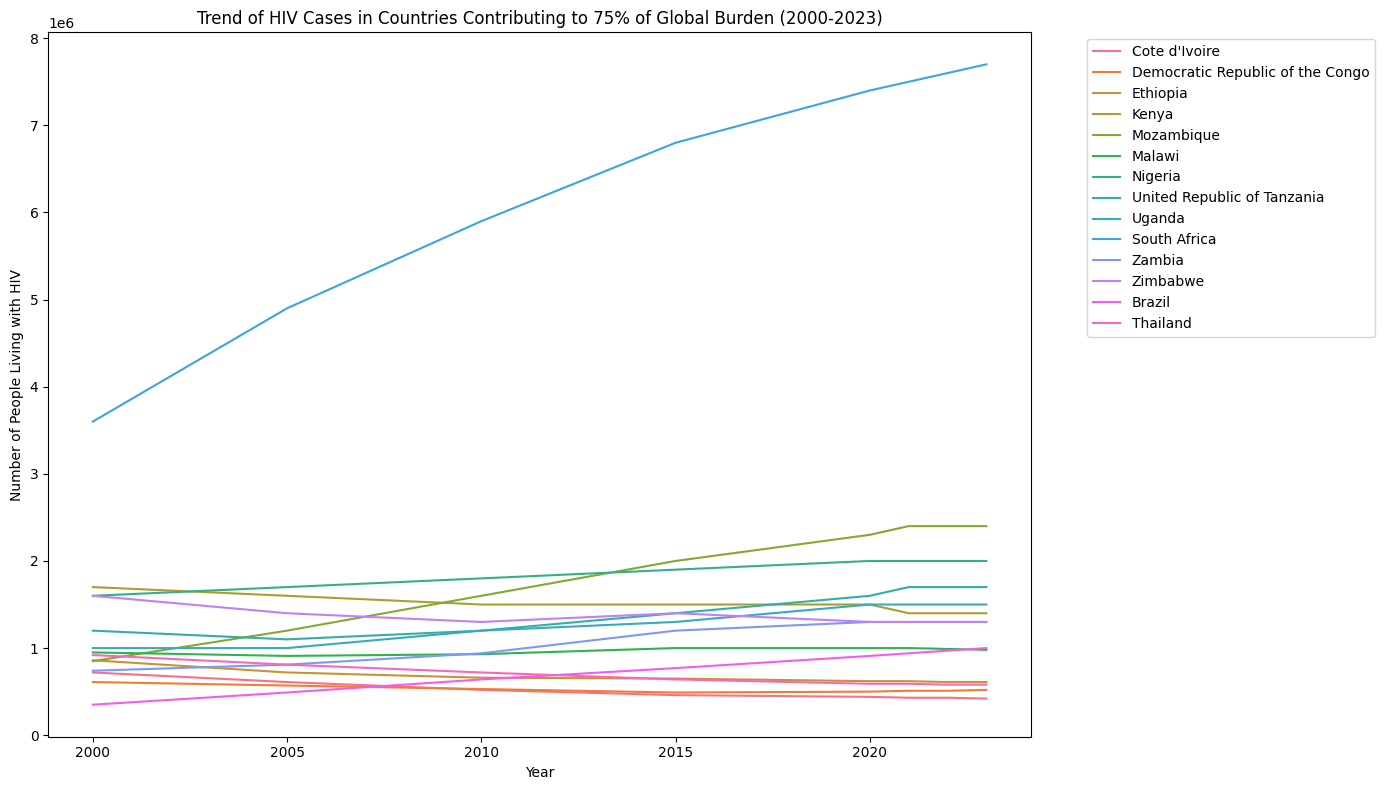

In [9]:
# Calculate total HIV cases by country
country_totals = hiv_data.groupby('Location')['Value'].sum().sort_values(ascending=False)

# Calculate cumulative percentage
cumulative_percent = country_totals.cumsum() / country_totals.sum() * 100

# Get countries contributing to 75% of global burden
top_countries = cumulative_percent[cumulative_percent <= 75].index.tolist()

# Filter data for these countries
top_countries_data = hiv_data[hiv_data['Location'].isin(top_countries)]

# Plot the trend
plt.figure(figsize=(14, 8))
sns.lineplot(data=top_countries_data, x='Year', y='Value', hue='Location', 
             estimator='sum', errorbar=None)
plt.title('Trend of HIV Cases in Countries Contributing to 75% of Global Burden (2000-2023)')
plt.ylabel('Number of People Living with HIV')
plt.xlabel('Year')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

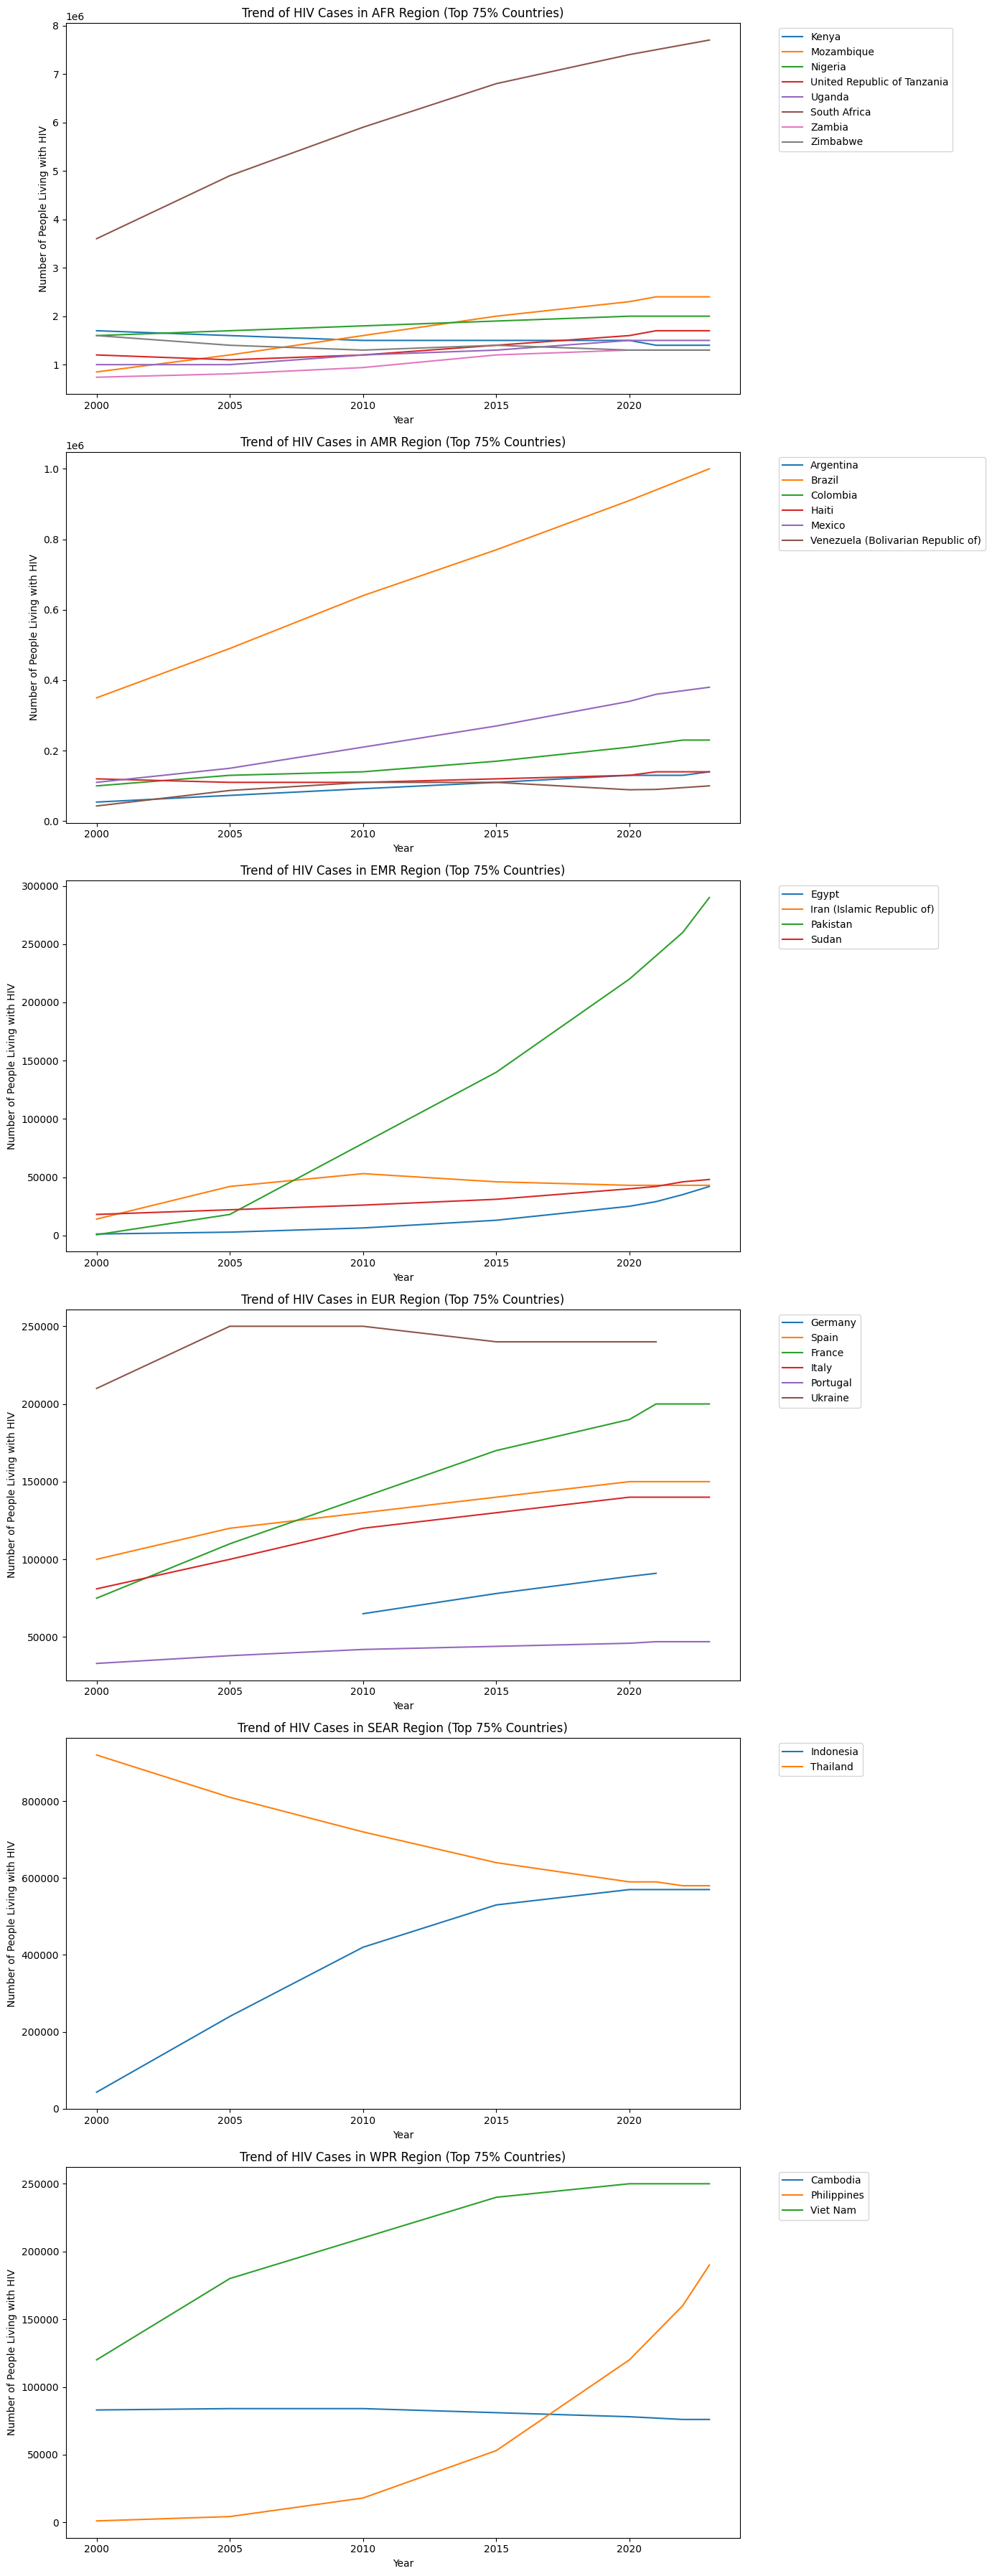

In [12]:
# Function to get top 75% countries in each region
def get_top_countries_by_region(region):
    region_data = hiv_data[hiv_data['ParentLocationCode'] == region]
    country_totals = region_data.groupby('Location')['Value'].sum().sort_values(ascending=False)
    cumulative_percent = country_totals.cumsum() / country_totals.sum() * 100
    return cumulative_percent[cumulative_percent <= 75].index.tolist()

# Get unique regions
regions = hiv_data['ParentLocationCode'].unique()

# Create subplots for each region
fig, axes = plt.subplots(len(regions), 1, figsize=(14, 6*len(regions)))

for i, region in enumerate(regions):
    top_countries = get_top_countries_by_region(region)
    region_data = hiv_data[(hiv_data['ParentLocationCode'] == region) & 
                          (hiv_data['Location'].isin(top_countries))]
    
    sns.lineplot(data=region_data, x='Year', y='Value', hue='Location', 
                 estimator='sum', errorbar=None, ax=axes[i])
    axes[i].set_title(f'Trend of HIV Cases in {region} Region (Top 75% Countries)')
    axes[i].set_ylabel('Number of People Living with HIV')
    axes[i].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [34]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [36]:
# Load the datasets for mortality rates
under_five_data = pd.read_csv(r"C:/Users/ADMIN/Documents/under_five mortality rate.csv")
neonatal_data = pd.read_csv(r"C:/Users/ADMIN/Documents/neonatal_mortality_rate.csv")

# Show the first few rows of each dataset to understand their structure
print(under_five_data.head())
print(neonatal_data.head())


                 REF_AREA     Geographic area INDICATOR  \
0  UNSDG_SUBSAHARANAFRICA  Sub-Saharan Africa    MRY0T4   
1  UNSDG_SUBSAHARANAFRICA  Sub-Saharan Africa    MRY0T4   
2  UNSDG_SUBSAHARANAFRICA  Sub-Saharan Africa    MRY0T4   
3  UNSDG_SUBSAHARANAFRICA  Sub-Saharan Africa    MRY0T4   
4  UNSDG_SUBSAHARANAFRICA  Sub-Saharan Africa    MRY0T4   

                   Indicator SEX    Sex WEALTH_QUINTILE Wealth Quintile  \
0  Under-five mortality rate  _T  Total              _T           Total   
1  Under-five mortality rate  _T  Total              _T           Total   
2  Under-five mortality rate  _T  Total              _T           Total   
3  Under-five mortality rate  _T  Total              _T           Total   
4  Under-five mortality rate  _T  Total              _T           Total   

  SERIES_NAME       Series Name  ...  DEFINITION  INTERVAL  SERIES_METHOD  \
0     UN_IGME  UN IGME estimate  ...         NaN         1            NaN   
1     UN_IGME  UN IGME estimate  ...    

In [39]:
# Check the column names in both datasets
print("Under-Five Mortality Data Columns:")
print(under_five_data.columns)

print("\nNeonatal Mortality Data Columns:")
print(neonatal_data.columns)


Under-Five Mortality Data Columns:
Index(['REF_AREA', 'Geographic area', 'INDICATOR', 'Indicator', 'SEX', 'Sex',
       'WEALTH_QUINTILE', 'Wealth Quintile', 'SERIES_NAME', 'Series Name',
       'SERIES_YEAR', 'Series Year', 'REGIONAL_GROUP', 'Regional group',
       'TIME_PERIOD', 'OBS_VALUE', 'COUNTRY_NOTES', 'CONNECTION',
       'DEATH_CATEGORY', 'CATEGORY', 'OBS_STATUS', 'Observation Status',
       'UNIT_MEASURE', 'Unit of measure', 'SERIES_CATEGORY', 'Series Category',
       'SERIES_TYPE', 'Series Type', 'STD_ERR', 'REF_DATE',
       'AGE_GROUP_OF_WOMEN', 'Age Group of Women', 'TIME_SINCE_FIRST_BIRTH',
       'Time Since First Birth', 'DEFINITION', 'INTERVAL', 'SERIES_METHOD',
       'Series Method', 'LOWER_BOUND', 'UPPER_BOUND', 'STATUS',
       'YEAR_TO_ACHIEVE', 'MODEL', 'Model Used'],
      dtype='object')

Neonatal Mortality Data Columns:
Index(['REF_AREA', 'Geographic area', 'INDICATOR', 'Indicator', 'SEX', 'Sex',
       'WEALTH_QUINTILE', 'Wealth Quintile', 'SERIES_NAME',

In [42]:
# Check the column names of the datasets
print("Under Five Mortality Data Columns:", under_five_data.columns)
print("Neonatal Mortality Data Columns:", neonatal_data.columns)


Under Five Mortality Data Columns: Index(['REF_AREA', 'Geographic area', 'INDICATOR', 'Indicator', 'SEX', 'Sex',
       'WEALTH_QUINTILE', 'Wealth Quintile', 'SERIES_NAME', 'Series Name',
       'SERIES_YEAR', 'Series Year', 'REGIONAL_GROUP', 'Regional group',
       'TIME_PERIOD', 'OBS_VALUE', 'COUNTRY_NOTES', 'CONNECTION',
       'DEATH_CATEGORY', 'CATEGORY', 'OBS_STATUS', 'Observation Status',
       'UNIT_MEASURE', 'Unit of measure', 'SERIES_CATEGORY', 'Series Category',
       'SERIES_TYPE', 'Series Type', 'STD_ERR', 'REF_DATE',
       'AGE_GROUP_OF_WOMEN', 'Age Group of Women', 'TIME_SINCE_FIRST_BIRTH',
       'Time Since First Birth', 'DEFINITION', 'INTERVAL', 'SERIES_METHOD',
       'Series Method', 'LOWER_BOUND', 'UPPER_BOUND', 'STATUS',
       'YEAR_TO_ACHIEVE', 'MODEL', 'Model Used'],
      dtype='object')
Neonatal Mortality Data Columns: Index(['REF_AREA', 'Geographic area', 'INDICATOR', 'Indicator', 'SEX', 'Sex',
       'WEALTH_QUINTILE', 'Wealth Quintile', 'SERIES_NAME', 

In [44]:
# Filter data for the eight EAC countries based on the correct column name
under_five_eac = under_five_data[under_five_data['Geographic area'].isin(eac_countries)]
neonatal_eac = neonatal_data[neonatal_data['Geographic area'].isin(eac_countries)]

# Show the first few rows of the filtered datasets
print(under_five_eac.head())
print(neonatal_eac.head())


Empty DataFrame
Columns: [REF_AREA, Geographic area, INDICATOR, Indicator, SEX, Sex, WEALTH_QUINTILE, Wealth Quintile, SERIES_NAME, Series Name, SERIES_YEAR, Series Year, REGIONAL_GROUP, Regional group, TIME_PERIOD, OBS_VALUE, COUNTRY_NOTES, CONNECTION, DEATH_CATEGORY, CATEGORY, OBS_STATUS, Observation Status, UNIT_MEASURE, Unit of measure, SERIES_CATEGORY, Series Category, SERIES_TYPE, Series Type, STD_ERR, REF_DATE, AGE_GROUP_OF_WOMEN, Age Group of Women, TIME_SINCE_FIRST_BIRTH, Time Since First Birth, DEFINITION, INTERVAL, SERIES_METHOD, Series Method, LOWER_BOUND, UPPER_BOUND, STATUS, YEAR_TO_ACHIEVE, MODEL, Model Used]
Index: []

[0 rows x 44 columns]
Empty DataFrame
Columns: [REF_AREA, Geographic area, INDICATOR, Indicator, SEX, Sex, WEALTH_QUINTILE, Wealth Quintile, SERIES_NAME, Series Name, SERIES_YEAR, Series Year, REGIONAL_GROUP, Regional group, TIME_PERIOD, OBS_VALUE, COUNTRY_NOTES, CONNECTION, DEATH_CATEGORY, CATEGORY, OBS_STATUS, Observation Status, UNIT_MEASURE, Unit of m

In [46]:
# Check the unique values in the 'Geographic area' column
print(under_five_data['Geographic area'].unique())
print(neonatal_data['Geographic area'].unique())


['Sub-Saharan Africa']
['Sub-Saharan Africa']


In [48]:
# Check the unique values in the 'REF_AREA' column
print(under_five_data['REF_AREA'].unique())
print(neonatal_data['REF_AREA'].unique())


['UNSDG_SUBSAHARANAFRICA']
['UNSDG_SUBSAHARANAFRICA']


In [50]:
import geopandas as gpd
import os

# Define the path to the shapefiles
shapefile_path = r"C:/Users/ADMIN/Documents/eac_countries"

# Load all shapefiles in the folder
shapefiles = [os.path.join(shapefile_path, f) for f in os.listdir(shapefile_path) if f.endswith('.shp')]

# Check the shapefile path
print(f"Shapefiles found: {shapefiles}")

# Let's load one shapefile to inspect the data (pick the first shapefile)
gdf = gpd.read_file(shapefiles[0])

# Show basic info about the shapefile
print(gdf.info())
print(gdf.head())


Shapefiles found: ['C:/Users/ADMIN/Documents/eac_countries\\gadm41_BDI_0.shp', 'C:/Users/ADMIN/Documents/eac_countries\\gadm41_BDI_1.shp', 'C:/Users/ADMIN/Documents/eac_countries\\gadm41_BDI_2.shp', 'C:/Users/ADMIN/Documents/eac_countries\\gadm41_BDI_3.shp', 'C:/Users/ADMIN/Documents/eac_countries\\gadm41_BDI_4.shp', 'C:/Users/ADMIN/Documents/eac_countries\\gadm41_COD_0.shp', 'C:/Users/ADMIN/Documents/eac_countries\\gadm41_COD_1.shp', 'C:/Users/ADMIN/Documents/eac_countries\\gadm41_COD_2.shp', 'C:/Users/ADMIN/Documents/eac_countries\\gadm41_KEN_0.shp', 'C:/Users/ADMIN/Documents/eac_countries\\gadm41_KEN_1.shp', 'C:/Users/ADMIN/Documents/eac_countries\\gadm41_KEN_2.shp', 'C:/Users/ADMIN/Documents/eac_countries\\gadm41_KEN_3.shp', 'C:/Users/ADMIN/Documents/eac_countries\\gadm41_RWA_0.shp', 'C:/Users/ADMIN/Documents/eac_countries\\gadm41_RWA_1.shp', 'C:/Users/ADMIN/Documents/eac_countries\\gadm41_RWA_2.shp', 'C:/Users/ADMIN/Documents/eac_countries\\gadm41_RWA_3.shp', 'C:/Users/ADMIN/Docum

In [56]:
import geopandas as gpd
import pandas as pd

# Load the shapefile
shapefile_path = "C:/Users/ADMIN/Documents/eac_countries/gadm41_BDI_0.shp"  # Path to one of the shapefiles
gdf = gpd.read_file(shapefile_path)

# Load the datasets for mortality rates
under_five_data = pd.read_csv(r"C:/Users/ADMIN/Documents/under_five mortality rate.csv")
neonatal_data = pd.read_csv(r"C:/Users/ADMIN/Documents/neonatal_mortality_rate.csv")

# Clean the 'COUNTRY' and 'Geographic area' columns by stripping spaces and converting to lowercase
gdf['COUNTRY'] = gdf['COUNTRY'].str.strip().str.lower()
under_five_data['Geographic area'] = under_five_data['Geographic area'].str.strip().str.lower()
neonatal_data['Geographic area'] = neonatal_data['Geographic area'].str.strip().str.lower()

# Show the first few rows of each dataset to understand their structure
print("Under-Five Mortality Data:")
print(under_five_data.head())
print("\nNeonatal Mortality Data:")
print(neonatal_data.head())

# Check the columns of the shapefile to identify the correct column for merge
print("\nShapefile Columns:", gdf.columns)

# Merge the shapefile with the under-five mortality data based on 'COUNTRY' and 'Geographic area'
merged_gdf = gdf.merge(under_five_data, left_on='COUNTRY', right_on='Geographic area', how='left')

# Optional: Merge the shapefile with the neonatal mortality data based on 'COUNTRY' and 'Geographic area'
merged_gdf = merged_gdf.merge(neonatal_data, left_on='COUNTRY', right_on='Geographic area', how='left', suffixes=('_under_five', '_neonatal'))

# Check the merged result
print("\nMerged Data:")
print(merged_gdf.head())

# Optional: Save the merged data to a new shapefile
merged_gdf.to_file("C:/Users/ADMIN/Documents/merged_shapefile_mortality_data.shp")


Under-Five Mortality Data:
                 REF_AREA     Geographic area INDICATOR  \
0  UNSDG_SUBSAHARANAFRICA  sub-saharan africa    MRY0T4   
1  UNSDG_SUBSAHARANAFRICA  sub-saharan africa    MRY0T4   
2  UNSDG_SUBSAHARANAFRICA  sub-saharan africa    MRY0T4   
3  UNSDG_SUBSAHARANAFRICA  sub-saharan africa    MRY0T4   
4  UNSDG_SUBSAHARANAFRICA  sub-saharan africa    MRY0T4   

                   Indicator SEX    Sex WEALTH_QUINTILE Wealth Quintile  \
0  Under-five mortality rate  _T  Total              _T           Total   
1  Under-five mortality rate  _T  Total              _T           Total   
2  Under-five mortality rate  _T  Total              _T           Total   
3  Under-five mortality rate  _T  Total              _T           Total   
4  Under-five mortality rate  _T  Total              _T           Total   

  SERIES_NAME       Series Name  ...  DEFINITION  INTERVAL  SERIES_METHOD  \
0     UN_IGME  UN IGME estimate  ...         NaN         1            NaN   
1     UN_IGME

c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:37: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.


Unique countries in under-five data: ['sub-saharan africa']
Unique countries in neonatal data: ['sub-saharan africa']
Unique countries in shapefile: ['burundi']
Missing values in merged dataset:
 GID_0                         0
COUNTRY                       0
geometry                      0
REF_AREA_under_five           1
Geographic area_under_five    1
                             ..
UPPER_BOUND_neonatal          1
STATUS_neonatal               1
YEAR_TO_ACHIEVE_neonatal      1
MODEL_neonatal                1
Model Used_neonatal           1
Length: 91, dtype: int64


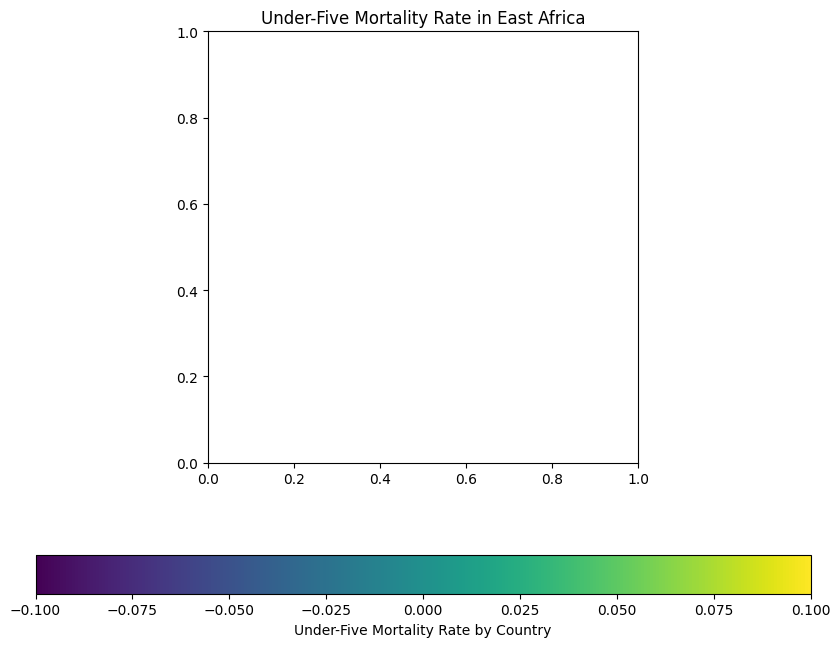

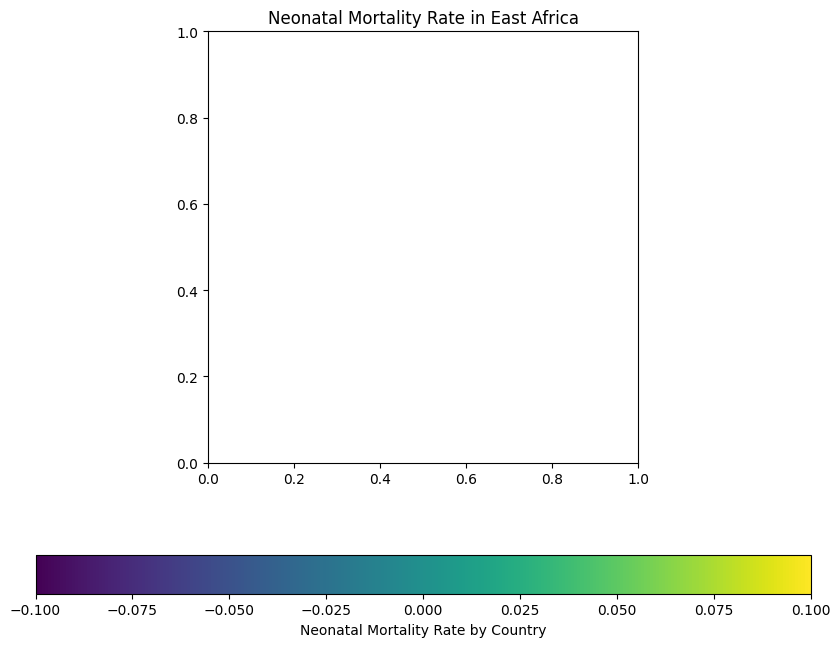

Countries with the highest under-five mortality rates:
 Empty DataFrame
Columns: [Geographic area, OBS_VALUE]
Index: []
Countries with the highest neonatal mortality rates:
 Empty DataFrame
Columns: [Geographic area, OBS_VALUE]
Index: []


In [65]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load the shapefile for the countries in the East African Community (EAC)
shapefile_path = "C:/Users/ADMIN/Documents/eac_countries/gadm41_BDI_0.shp"
gdf = gpd.read_file(shapefile_path)

# Load the datasets for mortality rates
under_five_data = pd.read_csv(r"C:/Users/ADMIN/Documents/under_five mortality rate.csv")
neonatal_data = pd.read_csv(r"C:/Users/ADMIN/Documents/neonatal_mortality_rate.csv")

# Clean the 'COUNTRY' and 'Geographic area' columns by stripping spaces and converting to lowercase
under_five_data['Geographic area'] = under_five_data['Geographic area'].str.strip().str.lower()
neonatal_data['Geographic area'] = neonatal_data['Geographic area'].str.strip().str.lower()

# Filter for East African Community countries
eac_countries = [
    'burundi', 'comoros', 'democratic republic of congo', 'kenya',
    'rwanda', 'south sudan', 'tanzania', 'uganda'
]

# Print unique countries in both datasets to check for any mismatches
print("Unique countries in under-five data:", under_five_data['Geographic area'].unique())
print("Unique countries in neonatal data:", neonatal_data['Geographic area'].unique())
print("Unique countries in shapefile:", gdf['COUNTRY'].str.lower().unique())

# Filter the shapefile to only include the EAC countries
gdf = gdf[gdf['COUNTRY'].str.lower().isin(eac_countries)]

# Filter the data to only include the relevant indicators for under-five mortality and neonatal mortality
under_five_data = under_five_data[under_five_data['INDICATOR'] == 'Under-Five Mortality Rate']
neonatal_data = neonatal_data[neonatal_data['INDICATOR'] == 'Neonatal Mortality Rate']

# Merge the shapefile with the under-five mortality data based on 'COUNTRY' and 'Geographic area'
merged_gdf = gdf.merge(under_five_data, left_on='COUNTRY', right_on='Geographic area', how='left')

# Merge the shapefile with the neonatal mortality data based on 'COUNTRY' and 'Geographic area'
merged_gdf = merged_gdf.merge(neonatal_data, left_on='COUNTRY', right_on='Geographic area', how='left', suffixes=('_under_five', '_neonatal'))

# Check for missing values in the merged dataset
print("Missing values in merged dataset:\n", merged_gdf.isnull().sum())

# Plotting the mortality data on a map for under-five mortality
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
merged_gdf.plot(column='OBS_VALUE_under_five', ax=ax, legend=True,
                legend_kwds={'label': "Under-Five Mortality Rate by Country",
                             'orientation': "horizontal"})
ax.set_title("Under-Five Mortality Rate in East Africa")
plt.show()

# Plotting the mortality data on a map for neonatal mortality
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
merged_gdf.plot(column='OBS_VALUE_neonatal', ax=ax, legend=True,
                legend_kwds={'label': "Neonatal Mortality Rate by Country",
                             'orientation': "horizontal"})
ax.set_title("Neonatal Mortality Rate in East Africa")
plt.show()

# Identify countries with the highest under-five mortality rates
highest_under_five = under_five_data.loc[under_five_data.groupby('Geographic area')['OBS_VALUE'].idxmax()]
highest_under_five_sorted = highest_under_five.sort_values(by='OBS_VALUE', ascending=False)
print("Countries with the highest under-five mortality rates:\n", highest_under_five_sorted[['Geographic area', 'OBS_VALUE']])

# Identify countries with the highest neonatal mortality rates
highest_neonatal = neonatal_data.loc[neonatal_data.groupby('Geographic area')['OBS_VALUE'].idxmax()]
highest_neonatal_sorted = highest_neonatal.sort_values(by='OBS_VALUE', ascending=False)
print("Countries with the highest neonatal mortality rates:\n", highest_neonatal_sorted[['Geographic area', 'OBS_VALUE']])
